In [1]:
# Heat budget for the lower layer
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [51]:
# Find the uppler and lower layer depth above the sill crest
def Layer(u):
    # Layer interface, zero velocity crossing point
    #l = np.empty(len(X)-2)
    h1 = np.empty(len(X))
    z_th = np.empty(len(X))
    h1[0] = h1[-1] = np.nan
    z_th[0] = z_th[-1] = np.nan
    itf = np.empty(len(X)-1)
    itf[0] = np.nan
    for i in range(1,len(X)-1):
        l = np.where(u[:, i] < 0)[-1][0]
        itf[i] = l
        z_th[i] = w[l, i] * pt[l-1:l+1, i].mean() *  200 * 200 
        # Calculate layer depth
        h1[i] = depth[l]
        #if l <= 9:
        #    h1[i] = -depth[l]+0.25
        #elif l <= 19:
        #    h1[i] = -depth[l]+0.5
        #elif l <= 29:
       #     h1[i] = -depth[l]+0.75
        #elif l <= 39:
       #     h1[i] = -depth[l]+2
       # elif l <= 49:
        #    h1[i] = -depth[l]+4
    return (itf, z_th, h1)

array([-20891.55126786, -21905.68868779, -23095.32280779])

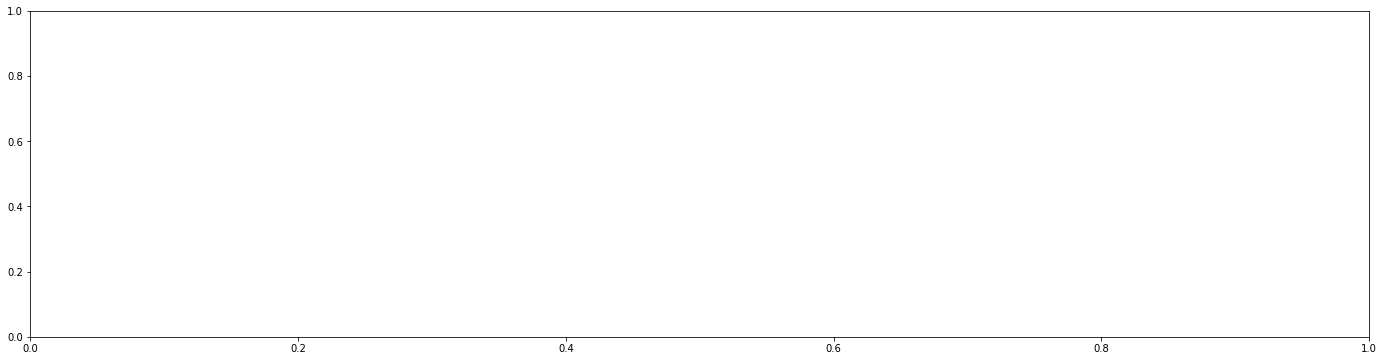

In [52]:
Cp = 4220  # Specific heat content J/kg/C
rho = 1025 # Density
# Grid areas
Area = np.empty(50)
Area[:10] = 100
Area[10:20] = 200
Area[20:30] = 300
Area[30:40] = 800
Area[40:] = 1600


files = sorted(glob.glob('/Users/weiyangbao/Documents/Model_outputs/state700/Hs*.nc'))
Hs = np.array([10, 12, 15])
fig, ax = plt.subplots(figsize=(24,6)) 

H1 = np.empty(len(Hs))
H2 = np.empty(len(Hs))
H3 = np.empty(len(Hs))
for i in range(len(files)):
    state0 = xr.open_dataset(files[i])
    t0 = 60 # Start from day 30
    tn = len(state0.T) # End day
    state = state0.isel(Y = range(1,10), T = range(t0,tn)) # Remove the boundary walls in y direction
    pt = state.Temp.data.mean(axis=(0,2))
    w = state.W.data.mean(axis=(0,2))
    X = state.X.data
    x_dist = X / 1000
    depth = state.Zl.data
    u0 = state.U.data # dims = T, Z, Y, Xp1
    u_ymean = (u0[:, :, :, 1:].mean(2) + u0[:, :, :, :-1].mean(2)) / 2
    u = u_ymean.mean(0) # dims = Z, X
    u[u==0] = np.nan
    itf, z_th, h1 = Layer(u)
    
    Q1 = u[:,1]*pt[:,1] * Area  * Cp * rho
    Q2 = u[:,28]*pt[:,28] * Area  * Cp * rho
    #Q2 = Q2[~np.isnan(Q2)]
    H1[i] = Q1[np.int(itf[1]):].sum()
    H2[i] = Q2[np.int(itf[28]):].sum()
    H3[i] = z_th[1:-1].sum() * 9
    
H3